In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
plt.style.use(hep.style.NA62)
plt.rc('legend',fontsize=12)
import CEDAR_Parameters as Cpm
importlib.reload(Cpm)
import UsefulFunctions as Ufunc
importlib.reload(Cpm)
from scipy.integrate import quad
from scipy.stats import poisson
CEDARH = Cpm.CEDARH()
UF = Ufunc.UsefulFunctions(CEDARH)

In [156]:
filename = "Cedar_data/data_step_smalltest.txt"

In [157]:
def ELConvert(value):
  return  1.239841 / value


In [158]:
events = []
splitted = []
eventno = 0

with open(filename) as f:
    for line in f:
        if "=" in line.split(",")[0]:
            events.append(splitted)
            splitted = []
            print(eventno, end="\r")
            eventno += 1
            continue
        splitted.append(line.split(","))

In [159]:
count_z = []  
waves = []
angle  = []
angle_xy  = []
x_prod = []
y_prod = []


#fig01, ax01 = plt.subplots(1, 1, figsize=(10, 10))

for t in range(len(events)):  
    max_ = 0
    min_ = 9999999
    count=0
    previd = -99
    for i in range(len(events[t])):
        z = float(events[t][i][2])
        e = float(events[t][i][9])
        x = float(events[t][i][0])
        y = float(events[t][i][1])
        _id = int(events[t][i][5])
        prevol = str(events[t][i][7])
        x1 = float(events[t][i][10])
        y1 = float(events[t][i][11])
        z1 = float(events[t][i][12])
        waves.append(ELConvert(e*1e6)*1e3)
        
        if previd != _id and "CedarRadiatorGas" in prevol:
            data_x = [x,x1]
            data_y = [y,y1]
            data_z = [z,z1]
            
            #ax01.plot(data_y,data_x)
            #if t==1:
                #ax01.plot(data_z,data_x)
            x_prod.append(x)
            y_prod.append(y)
            
            dist_x = x1-x
            dist_z = z1-z
            dist_y = y1-y
            #if (dist_z > 0):
            angle_xy.append(np.arctan(dist_y/dist_z))
            angle.append(np.arctan(dist_x/dist_z))
            
            #print(z)
            count+=1
            if z > max_:
                max_ = z
            if z < min_:
                min_ = z
        
        previd = _id
                    
    diff = (max_-min_)/1000
    if count/diff < 100:
        continue
    count_z.append(count/diff)

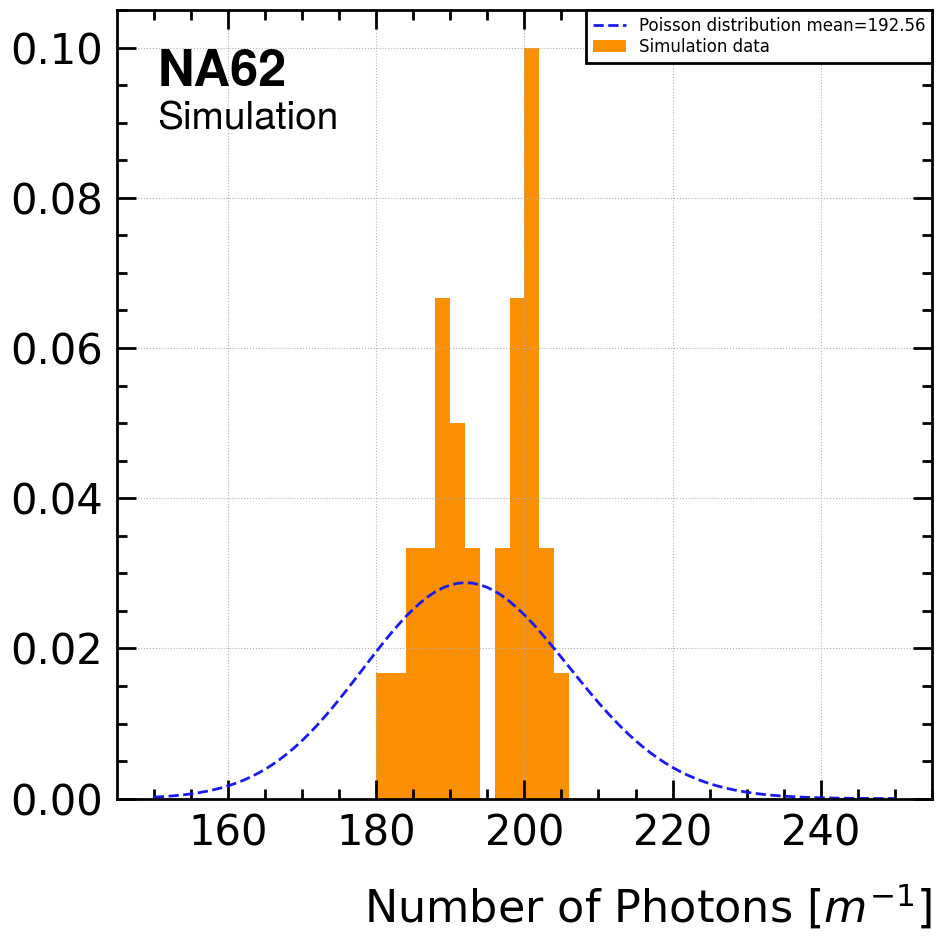

In [160]:
fig02, ax02 = plt.subplots(1, 1, figsize=(10, 10))
I = quad(UF.Tamm, 180e-9, 700e-9)
t = np.linspace(150, 250, 101)
data = poisson.pmf(t,I[0])
ax02.plot(t,data,"--", label="Poisson distribution mean={:.2f}".format(I[0]))
ax02.hist(count_z,bins=50,range=(150,250),density=True, label="Simulation data")
ax02.set_xlabel("Number of Photons [$m^{-1}$]")
hep.na62.text("Simulation")
plt.legend()
plt.grid()
plt.show()

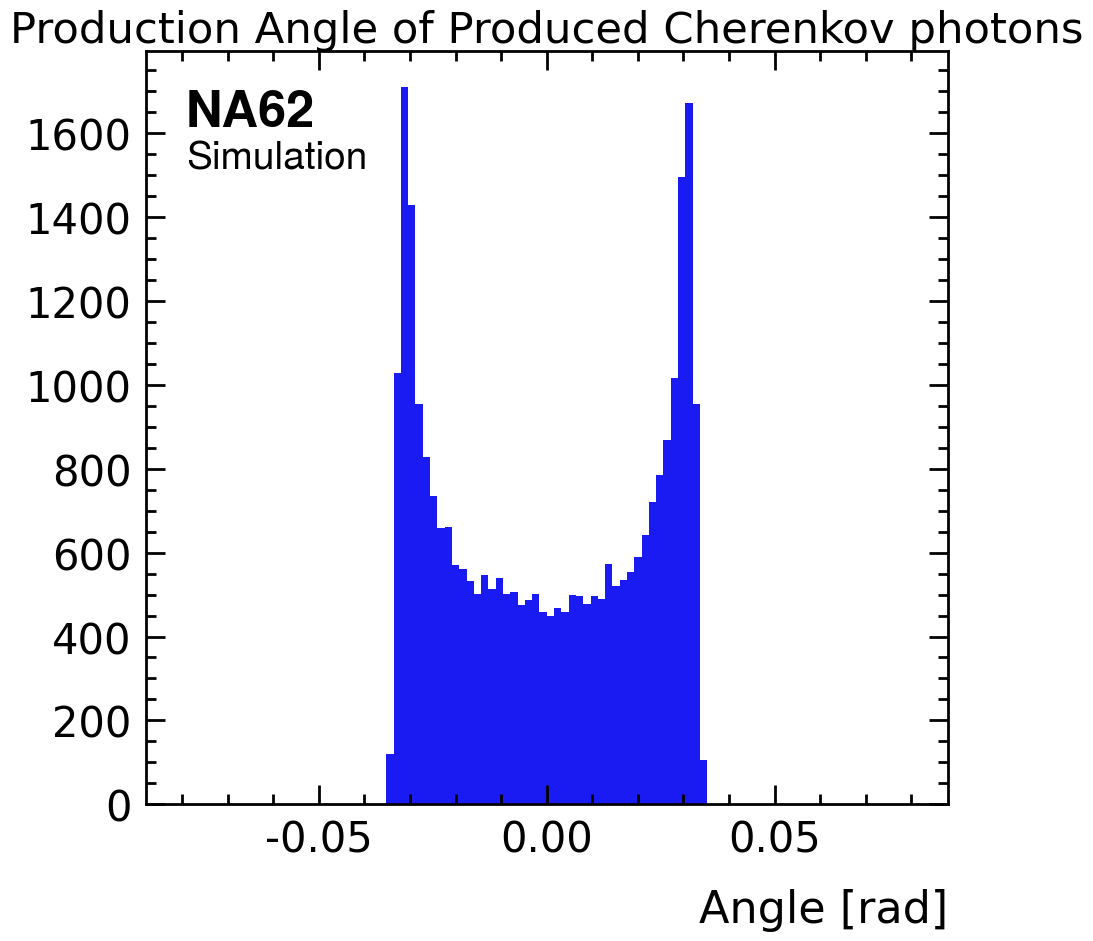

In [161]:
fig101, ax101 = plt.subplots(1, 1, figsize=(10, 10))
counts, bins, bars = ax101.hist(angle,bins=100,range=(-0.08,0.08))
ax101.set_title("Production Angle of Produced Cherenkov photons")
ax101.set_xlabel("Angle [rad]")
hep.na62.text("Simulation")
plt.show()

-0.0784 0.0
-0.07680000000000001 0.0
-0.0752 0.0
-0.0736 0.0
-0.07200000000000001 0.0
-0.0704 0.0
-0.0688 0.0
-0.0672 0.0
-0.0656 0.0
-0.064 0.0
-0.0624 0.0
-0.0608 0.0
-0.0592 0.0
-0.0576 0.0
-0.056 0.0
-0.054400000000000004 0.0
-0.0528 0.0
-0.051199999999999996 0.0
-0.049600000000000005 0.0
-0.048 0.0
-0.0464 0.0
-0.0448 0.0
-0.0432 0.0
-0.0416 0.0
-0.04 0.0
-0.0384 0.0
-0.0368 0.0
-0.0352 0.0
-0.0336 119.0
-0.032 1028.0
-0.030399999999999996 1710.0
-0.0288 1428.0
-0.027200000000000002 954.0
-0.025599999999999998 828.0
-0.024 735.0
-0.022399999999999996 658.0
-0.0208 662.0
-0.019200000000000002 570.0
-0.017599999999999998 560.0
-0.016 533.0
-0.014399999999999996 502.0
-0.012799999999999992 547.0
-0.011200000000000002 514.0
-0.009599999999999997 539.0
-0.007999999999999993 501.0
-0.006400000000000003 506.0
-0.004799999999999999 474.0
-0.0031999999999999945 486.0
-0.0016000000000000042 501.0
0.0 459.0
0.0016000000000000042 449.0
0.0032000000000000084 467.0
0.004799999999999999 459.0
0.

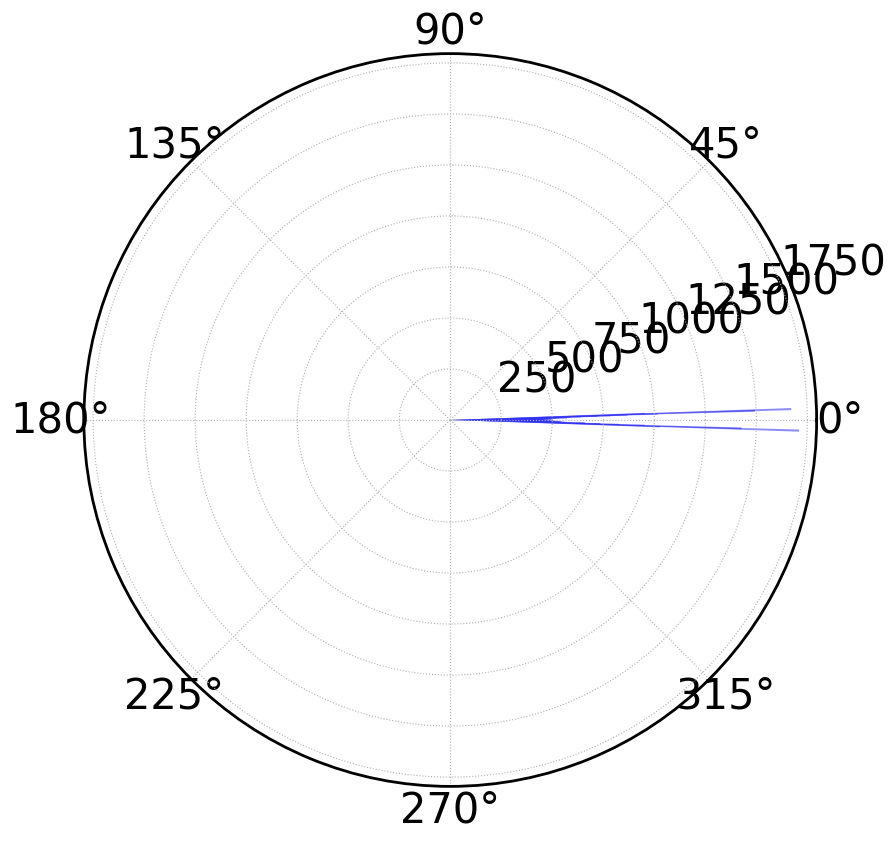

In [162]:
ax = plt.subplot(1, 1, 1, projection='polar')
#for i in range(len(bins[:1])):
bars = ax.bar(bins[1:], counts, width=0.006)
for i in range(len(bins[1:])):
    print(bins[1:][i], counts[i])
for bar in bars:
    bar.set_alpha(0.5)
plt.show()  

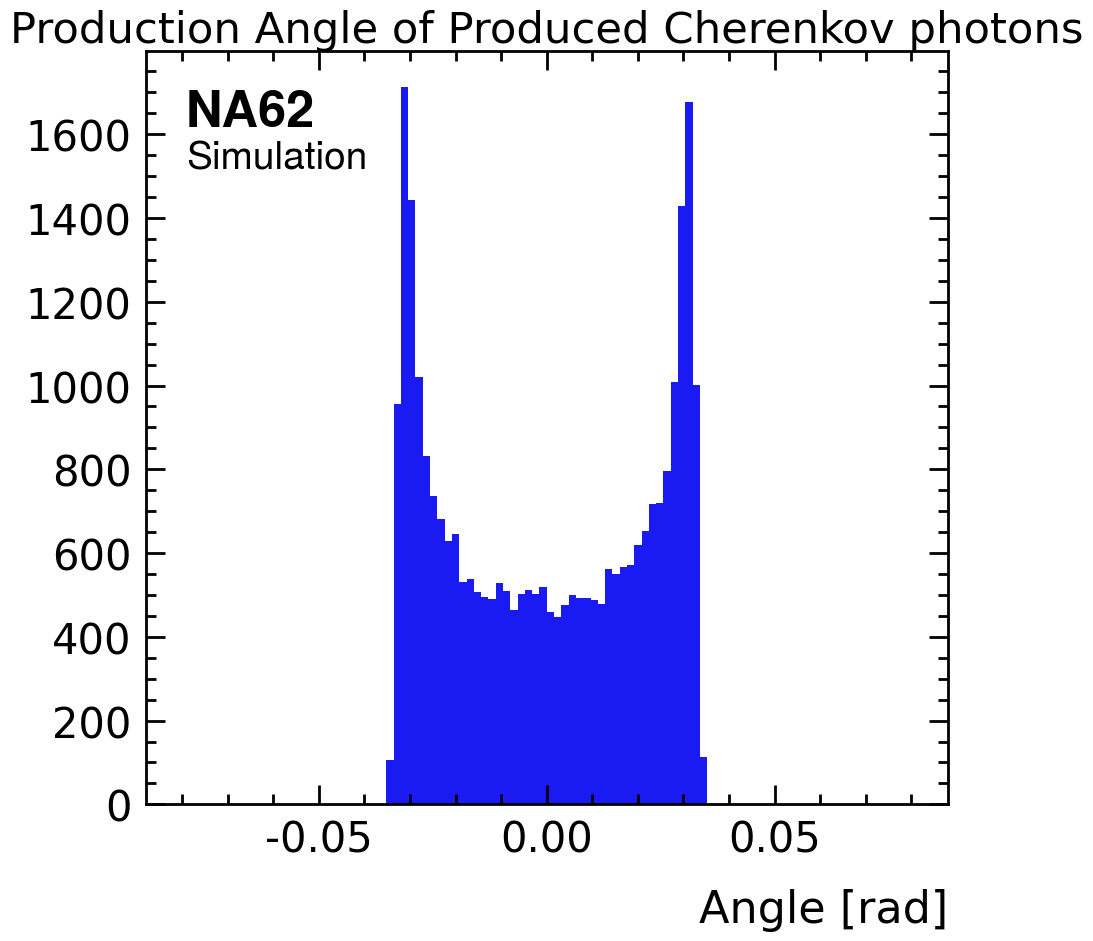

In [163]:
fig101, ax101 = plt.subplots(1, 1, figsize=(10, 10))
counts, bins, bars = ax101.hist(angle_xy,bins=100,range=(-0.08,0.08))
ax101.set_title("Production Angle of Produced Cherenkov photons")
ax101.set_xlabel("Angle [rad]")
hep.na62.text("Simulation")
plt.show()

-0.0784 0.0
-0.07680000000000001 0.0
-0.0752 0.0
-0.0736 0.0
-0.07200000000000001 0.0
-0.0704 0.0
-0.0688 0.0
-0.0672 0.0
-0.0656 0.0
-0.064 0.0
-0.0624 0.0
-0.0608 0.0
-0.0592 0.0
-0.0576 0.0
-0.056 0.0
-0.054400000000000004 0.0
-0.0528 0.0
-0.051199999999999996 0.0
-0.049600000000000005 0.0
-0.048 0.0
-0.0464 0.0
-0.0448 0.0
-0.0432 0.0
-0.0416 0.0
-0.04 0.0
-0.0384 0.0
-0.0368 0.0
-0.0352 0.0
-0.0336 107.0
-0.032 956.0
-0.030399999999999996 1713.0
-0.0288 1444.0
-0.027200000000000002 1020.0
-0.025599999999999998 832.0
-0.024 735.0
-0.022399999999999996 682.0
-0.0208 629.0
-0.019200000000000002 645.0
-0.017599999999999998 531.0
-0.016 537.0
-0.014399999999999996 506.0
-0.012799999999999992 496.0
-0.011200000000000002 490.0
-0.009599999999999997 528.0
-0.007999999999999993 509.0
-0.006400000000000003 463.0
-0.004799999999999999 501.0
-0.0031999999999999945 512.0
-0.0016000000000000042 501.0
0.0 519.0
0.0016000000000000042 460.0
0.0032000000000000084 447.0
0.004799999999999999 477.0
0.

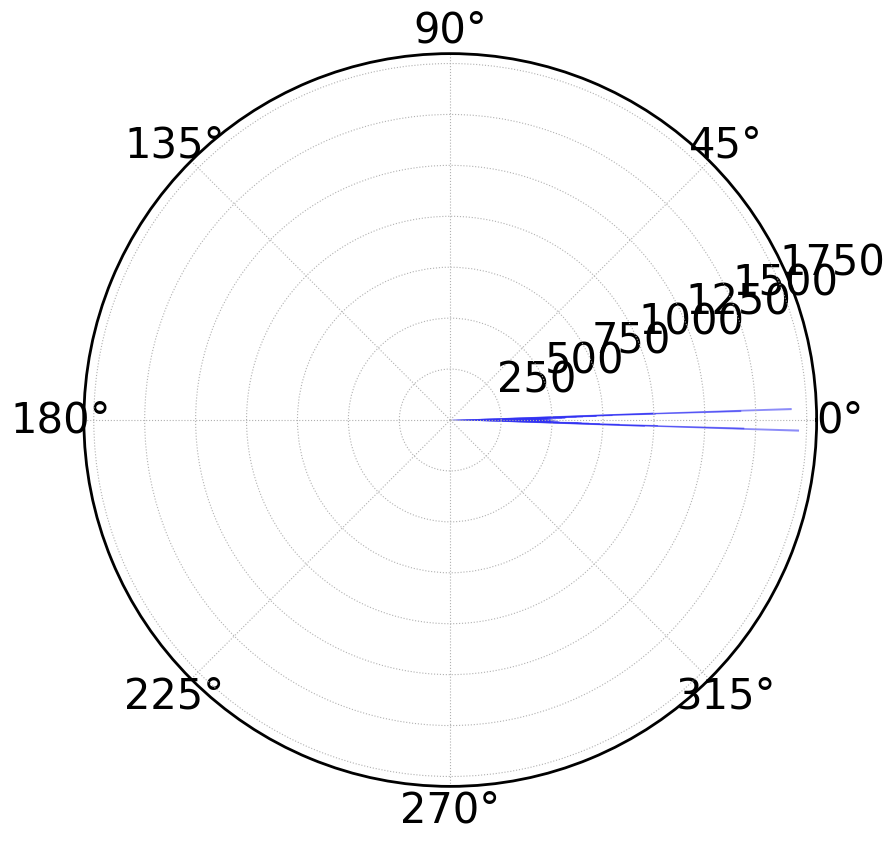

In [164]:
ax = plt.subplot(1, 1, 1, projection='polar')
#for i in range(len(bins[:1])):
bars = ax.bar(bins[1:], counts, width=0.006)
for i in range(len(bins[1:])):
    print(bins[1:][i], counts[i])
for bar in bars:
    bar.set_alpha(0.5)
plt.show()  

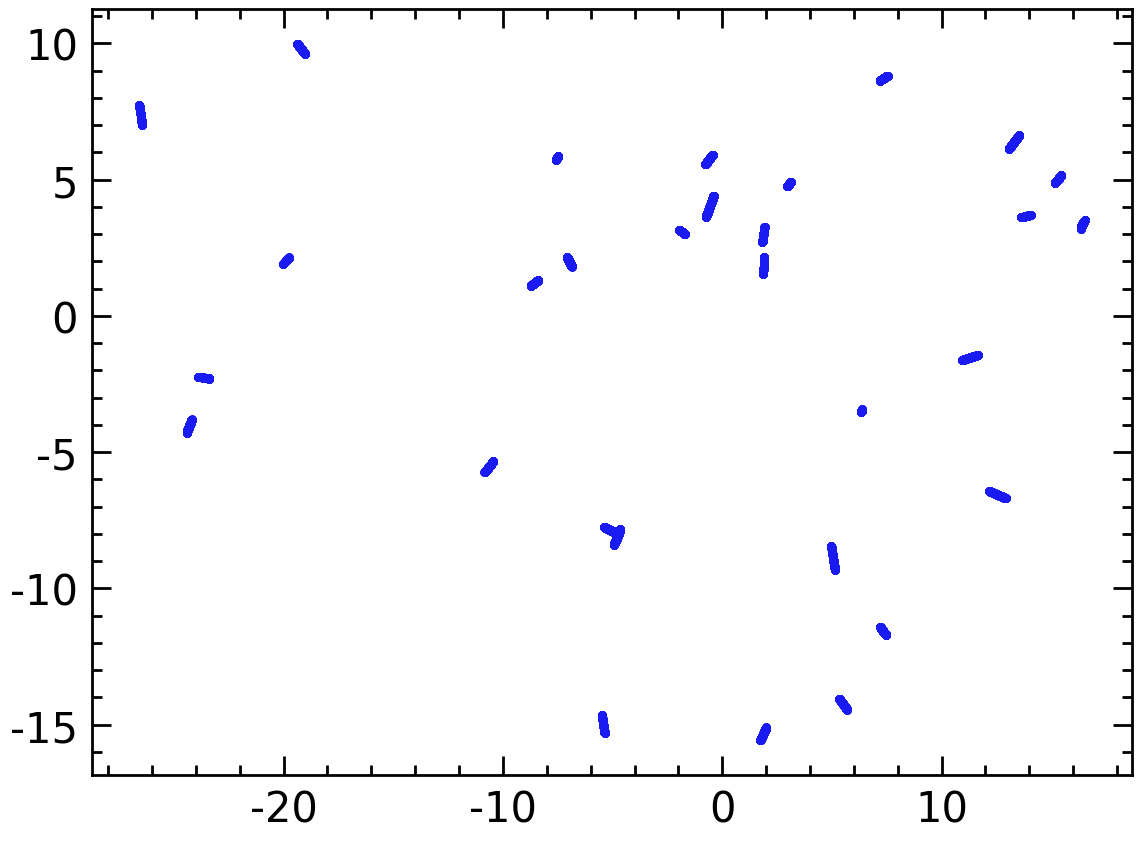

In [165]:
plt.scatter(x_prod,y_prod)

In [104]:
filename = "Cedar_data/data_step_test.txt"

In [105]:
events = []
splitted = []
eventno = 0
print(filename)
with open(filename) as f:
    for line in f:
        if "=" in line.split(",")[0]:
            events.append(splitted)
            splitted = []
            print(eventno, end="\r")
            eventno += 1
            continue
        splitted.append(line.split(","))

Cedar_data/data_step_test.txt


In [110]:
count_z2 = []  
waves2 = []
angle2  = []

#fig01, ax01 = plt.subplots(1, 1, figsize=(10, 10))

for t in range(len(events)):  
    max_ = 0
    min_ = 9999999
    count=0
    previd = -99
    for i in range(len(events[t])):
        z = float(events[t][i][2])
        e = float(events[t][i][9])
        x = float(events[t][i][0])
        y = float(events[t][i][1])
        _id = int(events[t][i][5])
        prevol = str(events[t][i][7])
        x1 = float(events[t][i][10])
        y1 = float(events[t][i][11])
        z1 = float(events[t][i][12])
        waves2.append(ELConvert(e*1e6)*1e3)
        
        if previd != _id and "CedarRadiatorGas" in prevol:
            data_x = [x,x1]
            data_y = [y,y1]
            data_z = [z,z1]
            
            #ax01.plot(data_y,data_x)
            #if t==1:
                #ax01.plot(data_z,data_x)
                
            dist_x = x1-x
            dist_z = z1-z
            #if (dist_z > 0):
            angle2.append(np.arctan(dist_x/dist_z))
            
            #print(z)
            count+=1
            if z > max_:
                max_ = z
            if z < min_:
                min_ = z
        
        previd = _id
                    
    diff = (max_-min_)/1000
    if count/diff < 100:
        continue
    count_z2.append(count/diff)

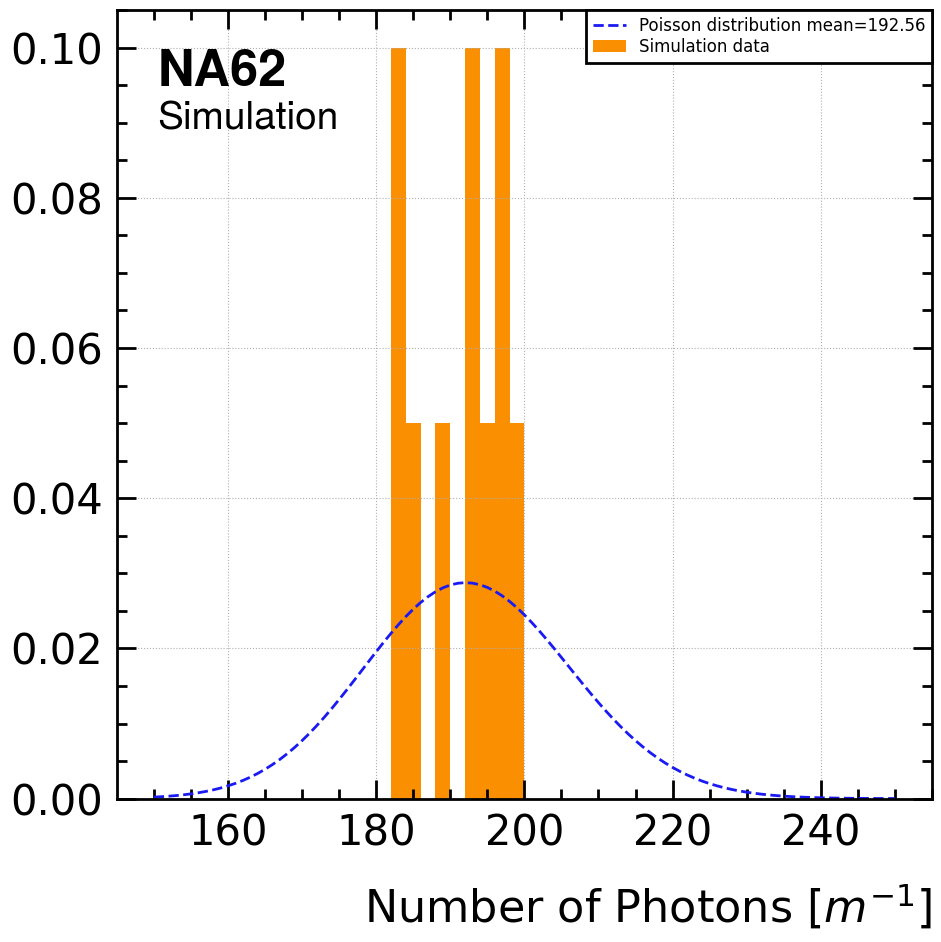

In [111]:
fig02, ax02 = plt.subplots(1, 1, figsize=(10, 10))
I = quad(UF.Tamm, 180e-9, 700e-9)
t = np.linspace(150, 250, 101)
data = poisson.pmf(t,I[0])
ax02.plot(t,data,"--", label="Poisson distribution mean={:.2f}".format(I[0]))
ax02.hist(count_z2,bins=50,range=(150,250),density=True, label="Simulation data")
ax02.set_xlabel("Number of Photons [$m^{-1}$]")
hep.na62.text("Simulation")
plt.legend()
plt.grid()
plt.show()

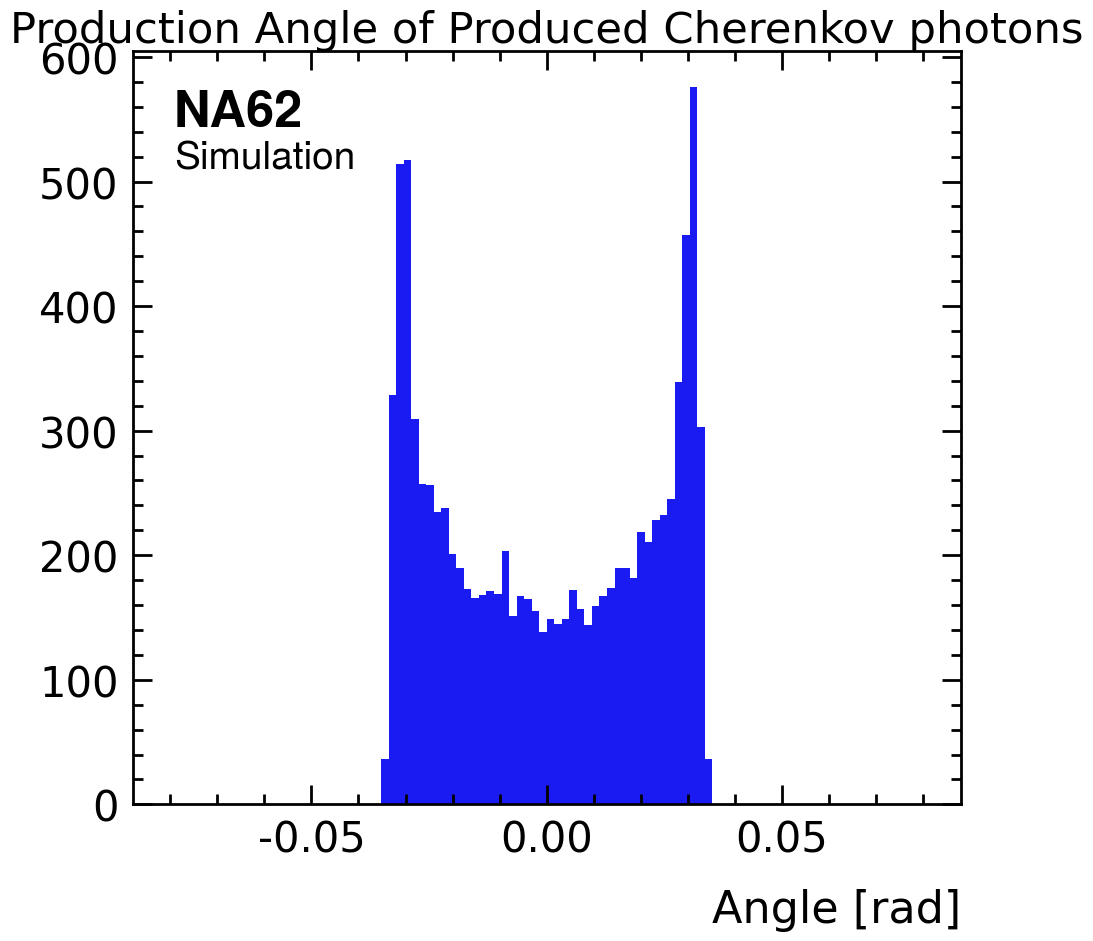

In [112]:
fig101, ax101 = plt.subplots(1, 1, figsize=(10, 10))
counts, bins, bars = ax101.hist(angle2,bins=100,range=(-0.08,0.08))
ax101.set_title("Production Angle of Produced Cherenkov photons")
ax101.set_xlabel("Angle [rad]")
hep.na62.text("Simulation")
plt.show()

-0.0784 0.0
-0.07680000000000001 0.0
-0.0752 0.0
-0.0736 0.0
-0.07200000000000001 0.0
-0.0704 0.0
-0.0688 0.0
-0.0672 0.0
-0.0656 0.0
-0.064 0.0
-0.0624 0.0
-0.0608 0.0
-0.0592 0.0
-0.0576 0.0
-0.056 0.0
-0.054400000000000004 0.0
-0.0528 0.0
-0.051199999999999996 0.0
-0.049600000000000005 0.0
-0.048 0.0
-0.0464 0.0
-0.0448 0.0
-0.0432 0.0
-0.0416 0.0
-0.04 0.0
-0.0384 0.0
-0.0368 0.0
-0.0352 0.0
-0.0336 36.0
-0.032 329.0
-0.030399999999999996 514.0
-0.0288 517.0
-0.027200000000000002 309.0
-0.025599999999999998 257.0
-0.024 256.0
-0.022399999999999996 235.0
-0.0208 238.0
-0.019200000000000002 201.0
-0.017599999999999998 190.0
-0.016 173.0
-0.014399999999999996 166.0
-0.012799999999999992 168.0
-0.011200000000000002 171.0
-0.009599999999999997 169.0
-0.007999999999999993 203.0
-0.006400000000000003 151.0
-0.004799999999999999 167.0
-0.0031999999999999945 165.0
-0.0016000000000000042 155.0
0.0 138.0
0.0016000000000000042 149.0
0.0032000000000000084 145.0
0.004799999999999999 149.0
0.0064

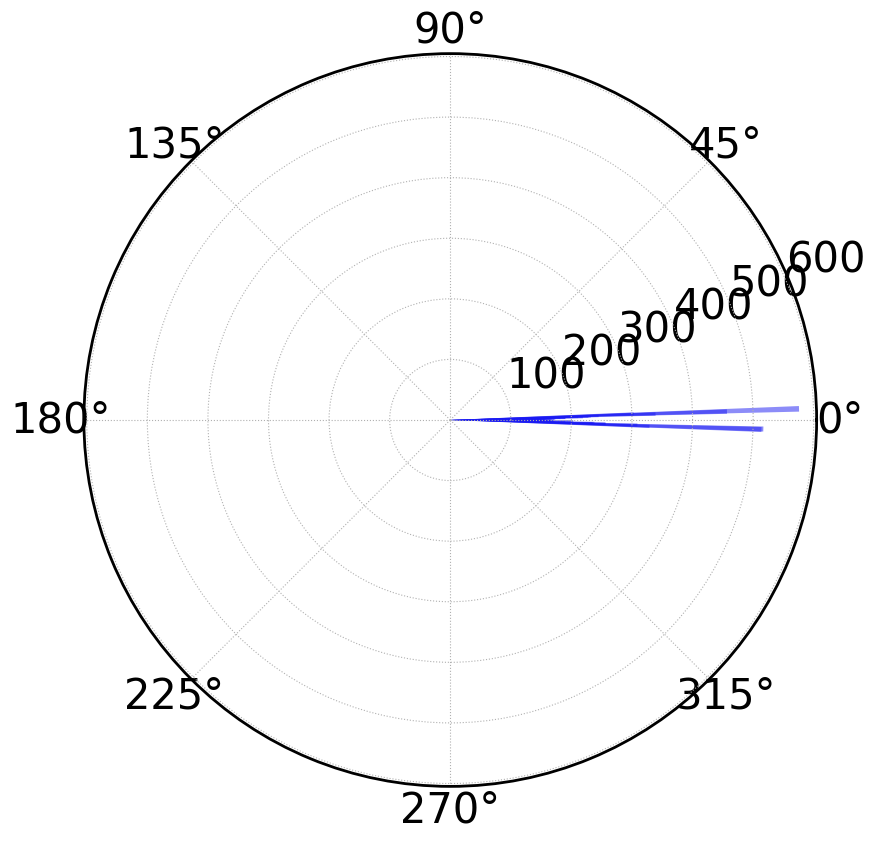

In [113]:
ax = plt.subplot(1, 1, 1, projection='polar')
#for i in range(len(bins[:1])):
bars = ax.bar(bins[1:], counts, width=0.016)

for i in range(len(bins[1:])):
    print(bins[1:][i], counts[i])
for bar in bars:
    bar.set_alpha(0.5)
plt.show()  